In [69]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
data = pd.read_csv('dataclean.csv')

#describe our data
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,married,familysize,surveyaccurate,rwasTot,extraversion,agreeableness,conscientiousness,emotionalstability,opennesstoexperience,vcheck
count,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,...,9661.000000,9661.000000,9661.0,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000
mean,3.377635,2.086060,2.705890,7.581622,2.944682,7.465714,2.846556,6.700082,7.541436,3.190351,...,1.381845,2.632706,1.0,102.271185,6.937490,8.630756,9.305078,8.989582,11.105564,0.275644
std,2.171316,2.055279,2.522236,2.358335,2.099750,2.265610,2.515083,2.390200,1.977361,2.621313,...,0.608461,1.379121,0.0,11.060758,3.431677,2.787375,3.034418,3.325870,2.432505,0.545731
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,21.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,2.000000,1.000000,1.000000,7.000000,1.000000,7.000000,1.000000,5.000000,7.000000,1.000000,...,1.000000,2.000000,1.0,96.000000,4.000000,7.000000,7.000000,6.000000,10.000000,0.000000
50%,3.000000,1.000000,1.000000,9.000000,2.000000,9.000000,2.000000,7.000000,8.000000,2.000000,...,1.000000,2.000000,1.0,100.000000,7.000000,9.000000,9.000000,9.000000,12.000000,0.000000
75%,5.000000,2.000000,3.000000,9.000000,4.000000,9.000000,4.000000,9.000000,9.000000,5.000000,...,2.000000,3.000000,1.0,108.000000,10.000000,11.000000,12.000000,12.000000,13.000000,0.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,3.000000,13.000000,1.0,179.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000


In [70]:
#check distribution of our dependent variable
stats.describe(data['rwasTot'])

DescribeResult(nobs=9661, minmax=(21.0, 179.0), mean=102.2711845217077, variance=122.34036276116257, skewness=0.5957395533565029, kurtosis=2.560132878162708)

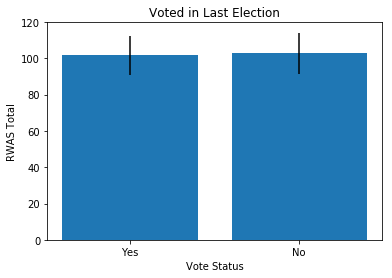

In [72]:
#let's plot some variables and run some common tests
#This should help us determine which predictors to include in our model

#voted graph
data.groupby('voted')['rwasTot'].mean()
data.groupby('voted')['rwasTot'].std()
objects = ['Yes', 'No']
votemean = [101.58, 102.79]
std = [10.67, 11.31]
y_pos = [i for i, _ in enumerate(objects)]

plt.bar(y_pos, votemean, yerr=std)
plt.xlabel("Vote Status")
plt.ylabel('RWAS Total')
plt.title('Voted in Last Election')
plt.xticks(y_pos, objects)
plt.savefig('ML2_1.png', dpi=300)
plt.show()

In [73]:
#t-test for 'voted' variable

yesvote = data[data['voted'] == 1]['rwasTot']
novote = data[data['voted'] == 2]['rwasTot']
stats.ttest_ind(yesvote, novote)

Ttest_indResult(statistic=-5.3593245684042055, pvalue=8.545794442564113e-08)

In [98]:
from statistics import mean, stdev
from math import sqrt

#Effect size for voted
cohens_d = (mean(yesvote) - mean(novote)) / (sqrt((stdev(yesvote) ** 2 + stdev(novote) ** 2) / 2))

print(cohens_d)

-0.11063592427830353


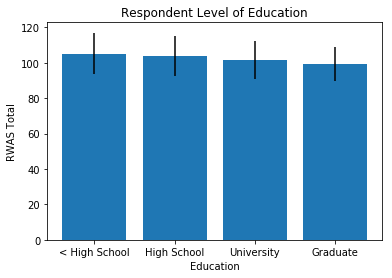

In [74]:
#Education graph
data.groupby('education')['rwasTot'].mean()
data.groupby('education')['rwasTot'].std()
objects = ('< High School', 'High School', 
           'University', 'Graduate')
educmean = [105.20,103.90,101.50,99.34]
std = [11.75,11.46,10.68,9.71]
y_pos = [i for i, _ in enumerate(objects)]

plt.bar(y_pos, educmean, yerr=std)
plt.xlabel("Education")
plt.ylabel('RWAS Total')
plt.title('Respondent Level of Education') 
plt.xticks(y_pos, objects)
plt.savefig('ML2_2.png', dpi=300)
plt.show()

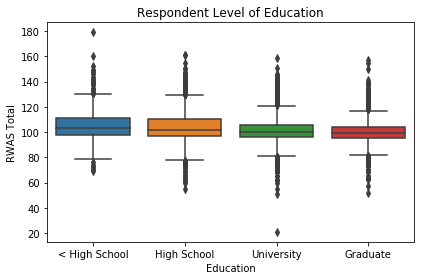

In [75]:
#Let's plot the same graph using Seaborn
import seaborn as sns
objects = ('< High School', 'High School', 
           'University', 'Graduate')
y_pos = [i for i, _ in enumerate(objects)]
boxpl = sns.boxplot(x="education", y="rwasTot", data=data)
fig = boxpl.get_figure()
plt.xlabel("Education")
plt.ylabel('RWAS Total')
plt.title('Respondent Level of Education') 
plt.xticks(y_pos, objects)
fig.tight_layout()
fig.savefig('ML2_2b.png', dpi=300)

In [76]:
#ANOVA: Education (using statsmodels gives you thorough information)
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('rwasTot ~ C(education)', data=data).fit()
results.summary()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(education),3.715373e+04,3.0,104.483834,1.447710e-66
Residual,1.144654e+06,9657.0,NaN,NaN


In [77]:
#Levene's test of homogeneity
stats.levene(data['rwasTot'][data['education'] == 1],
             data['rwasTot'][data['education'] == 2],
             data['rwasTot'][data['education'] == 3],
             data['rwasTot'][data['education'] == 4])

LeveneResult(statistic=30.476885199553795, pvalue=1.3323853229626246e-19)

In [78]:
#Kruskal-Wallis Test
stats.kruskal(data['rwasTot'][data['education'] == 1],
             data['rwasTot'][data['education'] == 2],
             data['rwasTot'][data['education'] == 3],
             data['rwasTot'][data['education'] == 4])

KruskalResult(statistic=315.53550686504457, pvalue=4.316873582808985e-68)

In [79]:
#ANOVA: efffect size
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

0.03143804488971962

In [80]:
#ANOVA: post hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data['rwasTot'], data['education'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 1.0    2.0   -1.2934  -2.3094 -0.2773  True 
 1.0    3.0   -3.6959  -4.7232 -2.6687  True 
 1.0    4.0   -5.8505  -6.9387 -4.7623  True 
 2.0    3.0   -2.4026  -3.0912  -1.714  True 
 2.0    4.0   -4.5571  -5.3337 -3.7806  True 
 3.0    4.0   -2.1546  -2.9457 -1.3635  True 
---------------------------------------------


In [104]:
#Check distribution of personality variables
stats.describe(data['extraversion'])

DescribeResult(nobs=9661, minmax=(2.0, 14.0), mean=6.937490303056794, variance=11.776405898763315, skewness=0.3371478972618854, kurtosis=-0.9435374159123286)

In [105]:
stats.describe(data['agreeableness'])

DescribeResult(nobs=9661, minmax=(2.0, 14.0), mean=8.630755539259372, variance=7.769458124760289, skewness=-0.07983867714823499, kurtosis=-0.45713034794226104)

In [106]:
stats.describe(data['conscientiousness'])

DescribeResult(nobs=9661, minmax=(2.0, 14.0), mean=9.305078050961276, variance=9.207692567187115, skewness=-0.3019078474520343, kurtosis=-0.6755958141665022)

In [107]:
stats.describe(data['emotionalstability'])

DescribeResult(nobs=9661, minmax=(2.0, 14.0), mean=8.989582491155662, variance=11.06140933144433, skewness=-0.24758544033670835, kurtosis=-0.9356989533408107)

In [108]:
stats.describe(data['opennesstoexperience'])

DescribeResult(nobs=9661, minmax=(2.0, 14.0), mean=11.105564195064758, variance=5.917078981332699, skewness=-0.897968336709367, kurtosis=0.4558124486853319)

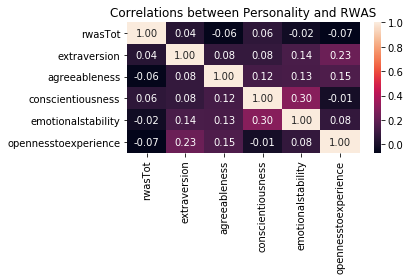

In [82]:
#Plot and correlate personality variables with RWAS
#correlation matrix heat map
datasel = data[['rwasTot', 'extraversion', 'agreeableness', 'conscientiousness',
                'emotionalstability', 'opennesstoexperience']]
corr = datasel.corr()
map = sns.heatmap(datasel.corr(), annot=True, fmt=".2f")
fig3 = map.get_figure()
plt.title('Correlations between Personality and RWAS') 
fig3.tight_layout()
fig3.savefig('ML2_3.png', dpi=300)

In [109]:
#pvalues for previous correlations
stats.pearsonr(data['rwasTot'], data['extraversion'])

(0.043839701713139646, 1.628593467711325e-05)

In [110]:
stats.pearsonr(data['rwasTot'], data['agreeableness'])

(-0.05559314209380576, 4.5567385032037665e-08)

In [111]:
stats.pearsonr(data['rwasTot'], data['conscientiousness'])

(0.06450059030279585, 2.2159535206706746e-10)

In [112]:
stats.pearsonr(data['rwasTot'], data['emotionalstability'])

(-0.018452803383284963, 0.06973118224493942)

In [113]:
stats.pearsonr(data['rwasTot'], data['opennesstoexperience'])

(-0.06761414851136918, 2.8801011924867488e-11)

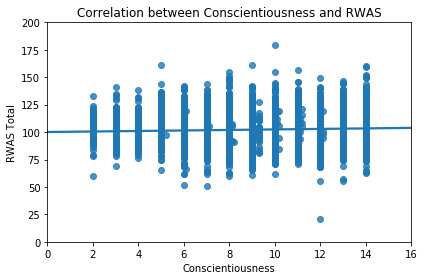

In [84]:
#Scatterplot (with regression line) between conscientiousness and RWAS total
plt.xlim(0,16)
plt.ylim(0,200)
reg = sns.regplot(x=data["conscientiousness"], y=data["rwasTot"])
fig4 = reg.get_figure()
plt.xlabel("Conscientiousness")
plt.ylabel('RWAS Total')
plt.title('Correlation between Conscientiousness and RWAS') 
fig4.tight_layout()
fig4.savefig('ML2_4.png', dpi=300)

In [116]:
#Basic multiple linear regresson
X = datasel
y = data['rwasTot']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rwasTot   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.247e+31
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:44:22   Log-Likelihood:             2.8106e+05
No. Observations:                9661   AIC:                        -5.621e+05
Df Residuals:                    9654   BIC:                        -5.621e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.487e-14   6.49e-15     -3.834      0.000   -3.76e-14   -1.22e-14
rwasTot                  1.0000   5.21e-17   1.92e+16      0.000       1.000       1.000
extraversion          1.096e-14   1.73e-16     63.379      0.000    1.06e-14    1.13e-14
agreeableness         3.025e-15    2.1e-16     14.386      0.000    2.61e-15    3.44e-15
conscientiousness    -1.492e-15   1.99e-16     -7.498      0.000   -1.88e-15    -1.1e-15
emotionalstability    6.172e-15   1.82e-16     33.837      0.000    5.81e-15    6.53e-15
opennesstoexperience  5.718e-15   2.44e-16     23.391      0.000    5.24e-15     6.2e-15
==============================================================================
Omnibus:                       13.160   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.652
Skew:                          -0.034   Prob(JB):                      0.00295
Kurtosis:                       2.844   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
#Let's redo this including some categorical variables that we have to dummy code
#create new predictor dataset with some categorical vars
X = data[['extraversion', 'agreeableness', 'conscientiousness','emotionalstability', 
          'opennesstoexperience','education','gender','religion','voted','married']]

In [118]:
X

,extraversion,agreeableness,conscientiousness,emotionalstability,opennesstoexperience,education,gender,religion,voted,married
0,12.0,12.0,6.000000,8.0,12.0,3.0,1.0,4.0,1.0,1.0
1,11.0,12.0,10.000000,8.0,14.0,4.0,1.0,6.0,1.0,2.0
2,2.0,3.0,11.000000,3.0,13.0,1.0,1.0,2.0,2.0,1.0
3,6.0,6.0,8.000000,5.0,13.0,3.0,2.0,10.0,2.0,3.0
4,2.0,2.0,5.000000,2.0,4.0,2.0,2.0,2.0,1.0,1.0
5,5.0,6.0,6.000000,10.0,12.0,2.0,1.0,12.0,2.0,2.0
6,7.0,9.0,6.000000,4.0,9.0,2.0,2.0,2.0,2.0,2.0
7,7.0,8.0,10.000000,12.0,11.0,2.0,1.0,4.0,1.0,1.0
8,2.0,8.0,6.000000,10.0,13.0,2.0,1.0,2.0,2.0,1.0
9,2.0,7.0,8.000000,2.0,7.0,2.0,2.0,2.0,2.0,1.0


In [119]:
X = pd.get_dummies(X, columns=['education','gender','religion','voted','married'],drop_first=True)

In [120]:
X

,extraversion,agreeableness,conscientiousness,emotionalstability,opennesstoexperience,education_2.0,education_3.0,education_4.0,gender_2.0,gender_3.0,...,religion_6.0,religion_7.0,religion_8.0,religion_9.0,religion_10.0,religion_11.0,religion_12.0,voted_2.0,married_2.0,married_3.0
0,12.0,12.0,6.000000,8.0,12.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.0,12.0,10.000000,8.0,14.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2.0,3.0,11.000000,3.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6.0,6.0,8.000000,5.0,13.0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
4,2.0,2.0,5.000000,2.0,4.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5.0,6.0,6.000000,10.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
6,7.0,9.0,6.000000,4.0,9.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
7,7.0,8.0,10.000000,12.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2.0,8.0,6.000000,10.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,2.0,7.0,8.000000,2.0,7.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
#Basic multiple linear regresson with categorical variables
y = data['rwasTot']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rwasTot   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     28.25
Date:                Sun, 20 Jan 2019   Prob (F-statistic):          4.62e-123
Time:                        17:44:38   Log-Likelihood:                -36599.
No. Observations:                9661   AIC:                         7.325e+04
Df Residuals:                    9636   BIC:                         7.343e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  104.1442      0.806    129.216      0.000     102.564     105.724
extraversion             0.2159      0.033      6.466      0.000       0.150       0.281
agreeableness           -0.1271      0.042     -3.039      0.002      -0.209      -0.045
conscientiousness        0.3583      0.039      9.278      0.000       0.283       0.434
emotionalstability      -0.0318      0.036     -0.881      0.378      -0.102       0.039
opennesstoexperience    -0.2454      0.047     -5.181      0.000      -0.338      -0.153
education_2.0           -1.0844      0.397     -2.732      0.006      -1.862      -0.306
education_3.0           -3.1687      0.418     -7.583      0.000      -3.988      -2.350
education_4.0           -5.0804      0.455    -11.153      0.000      -5.973      -4.188
gender_2.0               0.4454      0.243      1.832      0.067      -0.031       0.922
gender_3.0              -1.5781      0.810     -1.949      0.051      -3.165       0.009
religion_2.0             0.0107      0.291      0.037      0.971      -0.559       0.581
religion_3.0             2.7802      0.904      3.077      0.002       1.009       4.552
religion_4.0             2.1425      0.424      5.049      0.000       1.311       2.974
religion_5.0            -3.9481      1.213     -3.254      0.001      -6.327      -1.570
religion_6.0            -0.9375      0.413     -2.270      0.023      -1.747      -0.128
religion_7.0             1.5830      0.483      3.277      0.001       0.636       2.530
religion_8.0             6.9093      1.426      4.846      0.000       4.114       9.704
religion_9.0            -1.0117      0.962     -1.052      0.293      -2.897       0.874
religion_10.0            2.3437      0.923      2.539      0.011       0.535       4.153
religion_11.0            2.3568      4.378      0.538      0.590      -6.225      10.939
religion_12.0            1.4402      0.443      3.250      0.001       0.572       2.309
voted_2.0               -0.0219      0.234     -0.093      0.926      -0.480       0.437
married_2.0             -2.0108      0.283     -7.102      0.000      -2.566      -1.456
married_3.0             -1.5883      0.456     -3.483      0.000      -2.482      -0.694
==============================================================================
Omnibus:                      898.496   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2965.352
Skew:                           0.464   Prob(JB):                         0.00
Kurtosis:                       5.551   Cond. No.                         832.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""